# TP3 : Transformée de Fourier et aliasing

On charge l'image et on la convertit en niveaux de gris

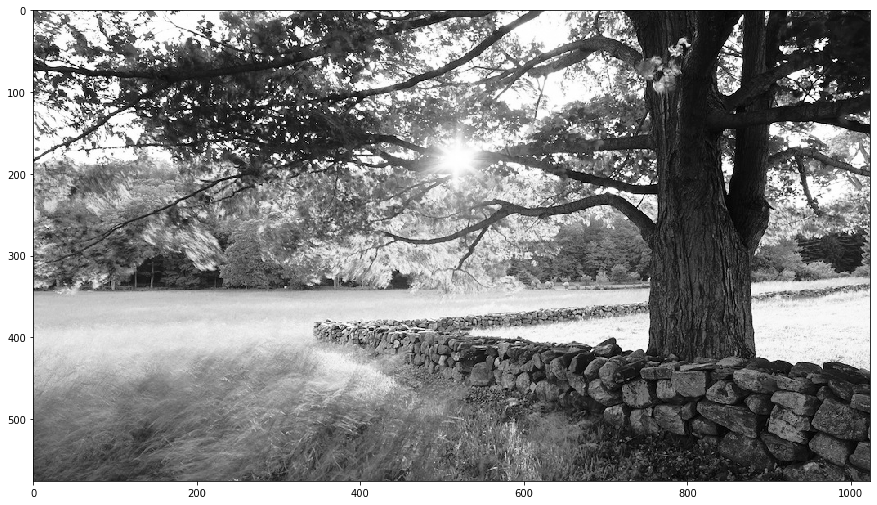

In [1]:
import numpy as np 
from numpy.fft import *
import matplotlib.pyplot as plt 

%matplotlib inline 

name='treewall.jpg'

def rgb2grey(I):
    return 0.2989*I[:,:,0] + 0.5870*I[:,:,1] + 0.1140*I[:,:,2]

cmap="Greys_r"
I=rgb2grey(plt.imread(name)).astype(float)
plt.figure(figsize=(15,15))
plt.imshow(I, cmap)
plt.show()

On visualise les éléments de la transformée de Fourier, en échelle logarithmique, avec les basses fréquences au centre

Partie réelle de la FFT


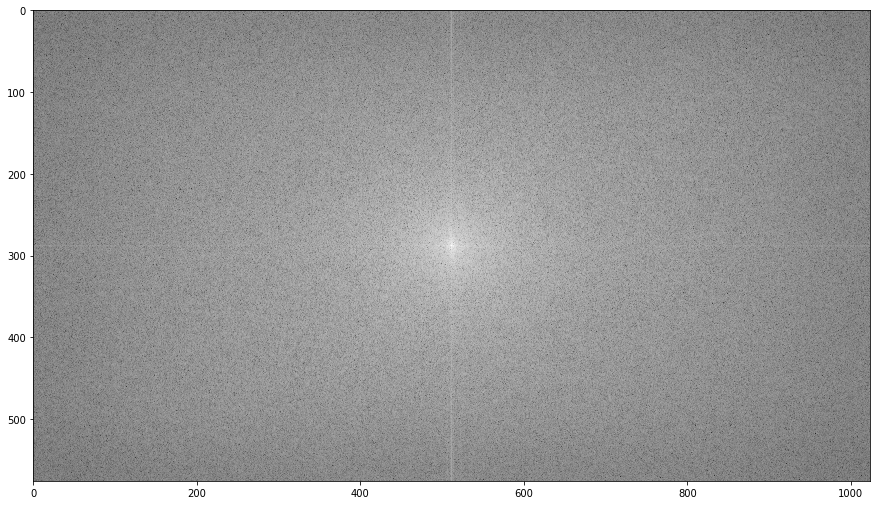

Partie imaginaire de la FFT


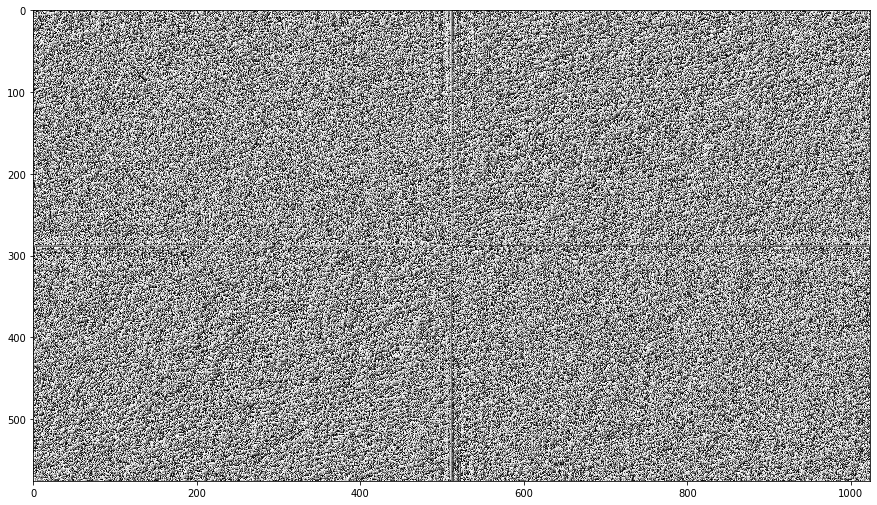

Module de la FFT


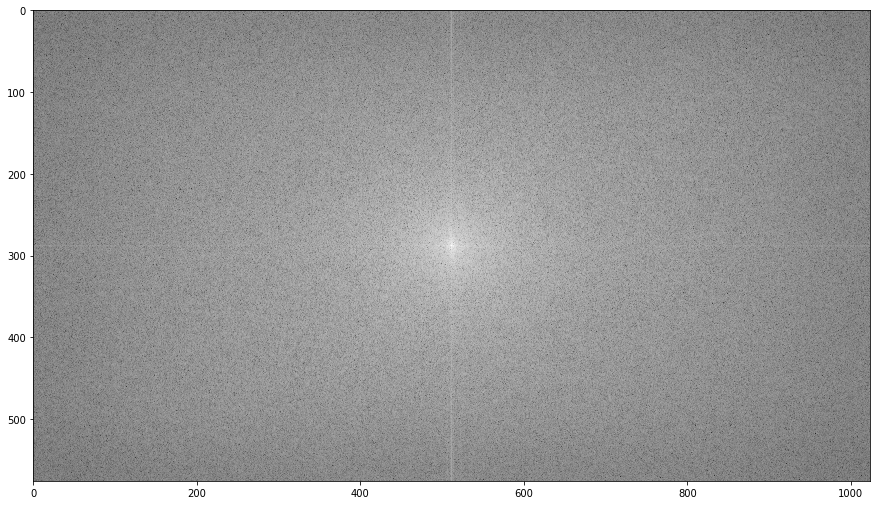

Phase de la FFT


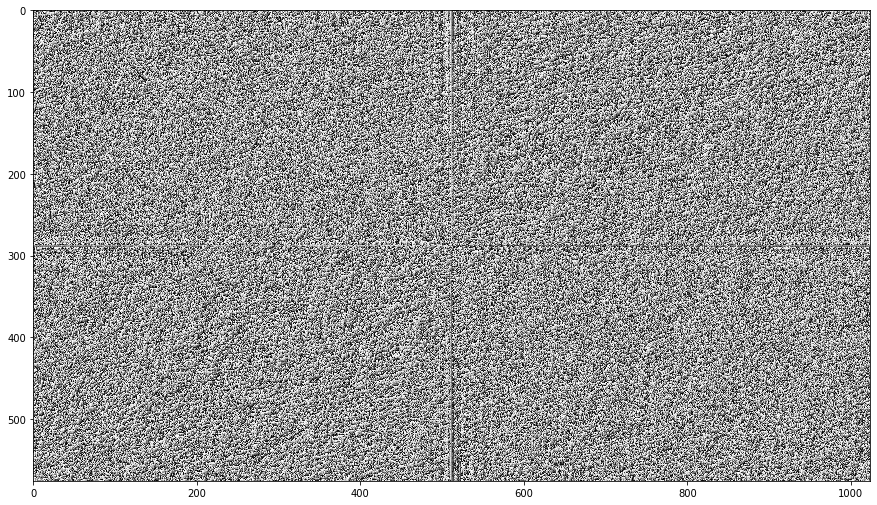

In [2]:
fft_tree = fft2(I)
plt.figure(figsize=(15,15))
print("Partie réelle de la FFT")
plt.imshow(np.log10(fftshift(fft_tree)).real, cmap)
plt.show()
plt.figure(figsize=(15,15))
print("Partie imaginaire de la FFT")
plt.imshow(np.log10(fftshift(fft_tree)).imag, cmap)
plt.show()
plt.figure(figsize=(15,15))
print("Module de la FFT")
plt.imshow(np.log10(abs(fftshift(fft_tree))), cmap)
plt.show()
plt.figure(figsize=(15,15))
print("Phase de la FFT")
plt.imshow(np.angle(fftshift(fft_tree)), cmap)
plt.show()

On va filtrer les fréquences apparaissant sur cette image, pour le garder que les basses fréquences

In [3]:
def passe_bas(I, f, size = 5, visualise = False):
    
    h, w = I.shape
    fft_I = fft2(I)
    
    def frequencies(i,j): # Retourne la fréquence associée au pixel en position i,j dans la TF
        return (i-int(h/2))/int(h/2), (j-int(w/2))/int(w/2)
    
    patch = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            i_f, j_f = frequencies(i, j)
            if i_f**2 + j_f**2 < f**2:
                patch[i,j] = 1
                
    if visualise:
        plt.figure(figsize=(size,size))
        plt.imshow(patch, cmap)
        plt.show()
    p_bas = ifft2(ifftshift(fftshift(fft_I)*patch)).real
    return p_bas

f = 0.005


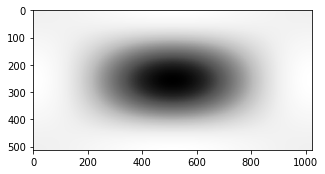

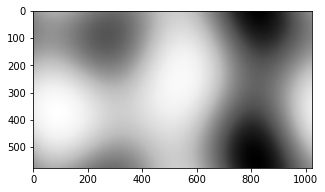

f = 0.01


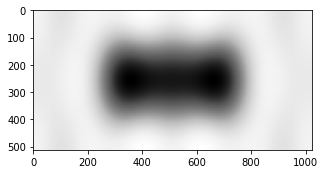

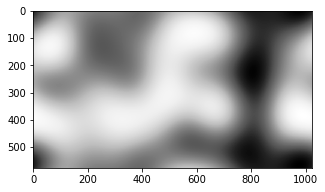

f = 0.02


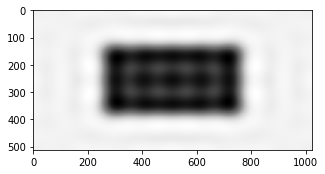

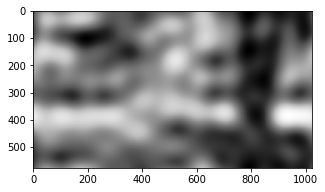

f = 0.03


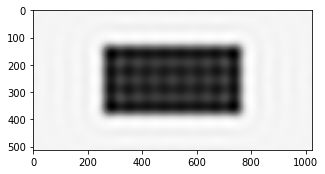

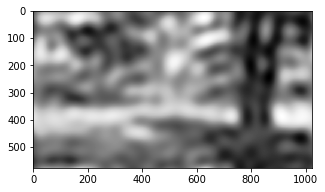

f = 0.04


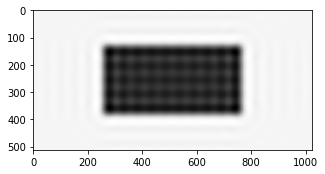

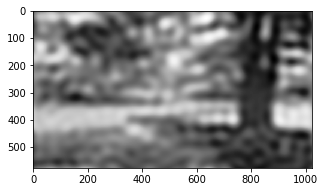

f = 0.06


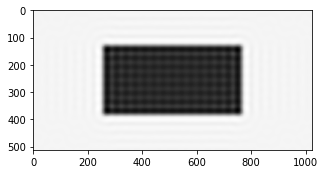

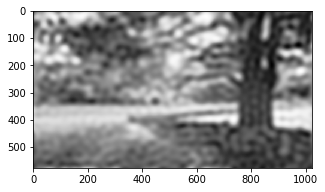

f = 0.08


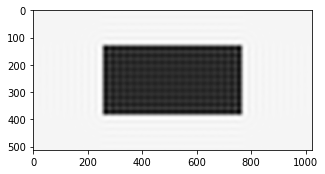

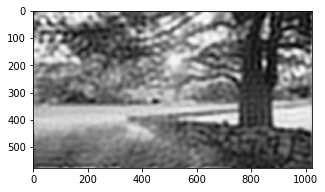

f = 0.1


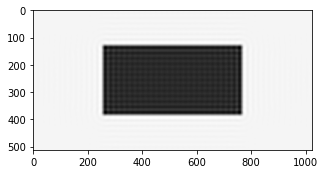

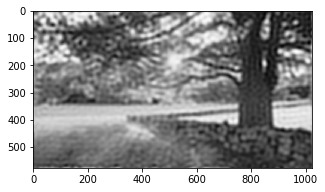

f = 0.2


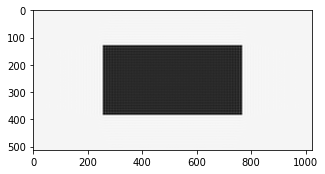

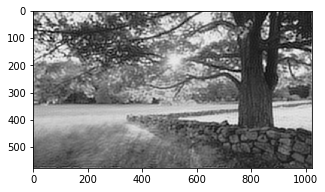

f = 0.5


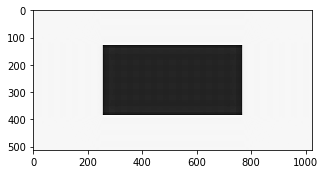

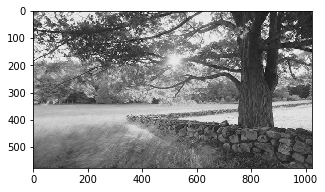

f = 1


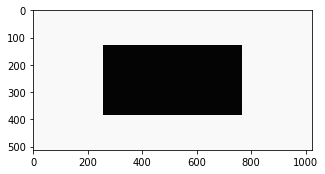

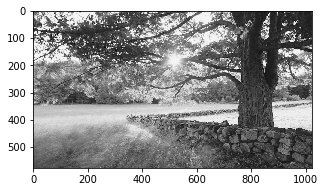

In [4]:
def rectangle(n1, n2): # Rectangle de taille n1, n2 centré
    output = np.ones((n1,n2))
    for i in range(n1//4, 3*n1//4):
        for j in range(n2//4, 3*n2//4):
            output[i][j] = 0
    return output

rectangle = rectangle(512, 1024)
f_values = [0.005, 0.01, 0.02, 0.03, 0.04, 0.06, 0.08, 0.1, 0.2, 0.5, 1]
size = 5
for f in f_values:
    print("f = " + str(f))
    p_1 = passe_bas(rectangle, f, size)
    p_2 = passe_bas(I, f, size)
    plt.figure(figsize=(size,size))
    plt.imshow(p_1, cmap)
    plt.show()
    plt.figure(figsize=(size,size))
    plt.imshow(p_2, cmap)
    plt.show()

Plus f est petit, moins on a de détails, donc plus la photo est floue. Aussi, on observe des halos vibrants autour du rectangle: c'est le phénomène de Gibbs.

On va maintenant observer le phénomène de repliement de spectre. On charge brickwall.jpg puis on l'affiche.

In [5]:
from ipywidgets import interact, FloatSlider
from IPython.display import display
name='brickwall.jpg'
cmap="Greys_r"
I=rgb2grey(plt.imread(name)).astype(float)

@interact(x=FloatSlider(min=0,max=20,step=1,value=15)) 
def show_wall(x):
    plt.figure(figsize=(x,x))
    plt.imshow(I, cmap)
    plt.show()

interactive(children=(FloatSlider(value=15.0, description='x', max=20.0, step=1.0), Output()), _dom_classes=('…

Pour des tailles d'images inférieures à 12 pouces, on observe le phénomène de repliement de spectre.

Un pixel sur 2


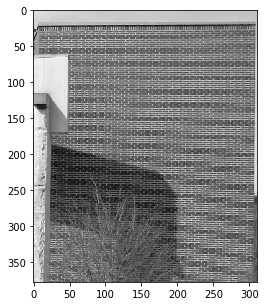

Un pixel sur 3


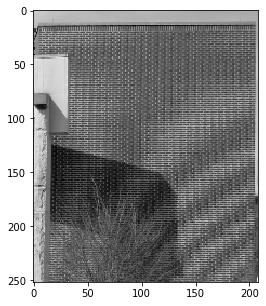

Un pixel sur 4


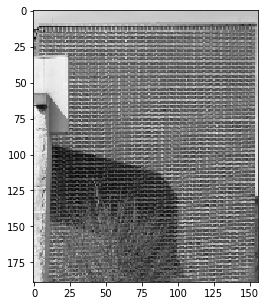

Un pixel sur 5


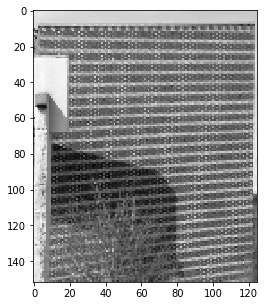

Un pixel sur 6


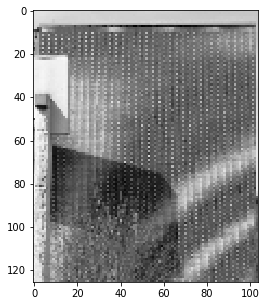

Un pixel sur 7


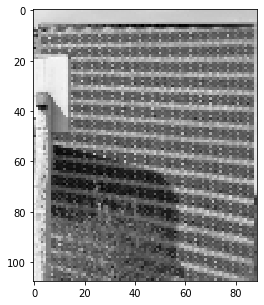

Un pixel sur 8


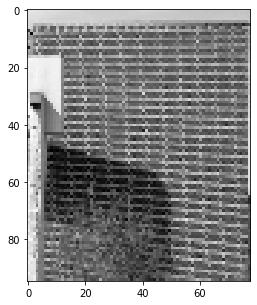

Un pixel sur 9


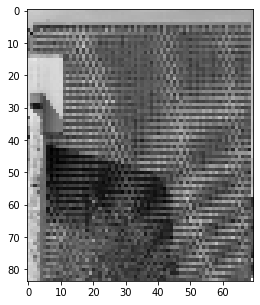

Un pixel sur 10


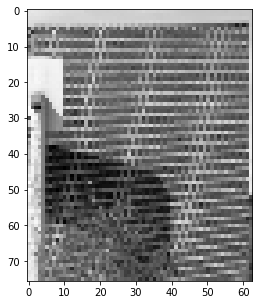

In [6]:
def sampling(I, T):
    h, w = I.shape
    out = np.array([[I[i,j] for j in range(w) if j%T == 0] for i in range(h) if i%T ==0])
    return out

size = 5
T_values = range(2, 11)

for T in T_values:
    print("Un pixel sur " + str(T))
    s = sampling(I, T)
    
    plt.figure(figsize=(size,size))
    plt.imshow(s, cmap)
    plt.show()

Moins il y de pixels dans une image, plus de phénomène d'aliasing est présent. On peut néanmoins filtrer les hautes fréquences avant de sous-échantilloner pour limiter l'aliasing.

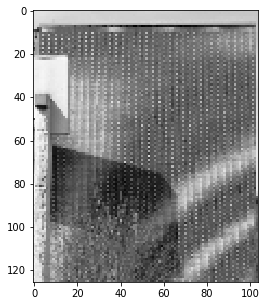

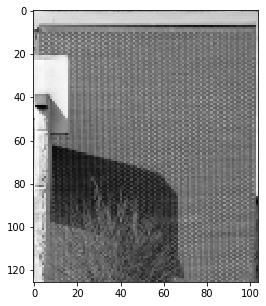

In [26]:
T = 6
s = sampling(I, T)
s_filtre = sampling(passe_bas(I, 0.3), T)
plt.figure(figsize=(size,size))
plt.imshow(s, cmap)
plt.show()
plt.figure(figsize=(size,size))
plt.imshow(s_filtre, cmap)
plt.show()